In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Dec 15 16:25:44 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/sample_data/hw1_data.zip -d /content/hw1_data/



Streaming output truncated to the last 5000 lines.
  inflating: /content/hw1_data/hw1_data/Dog_Emotion/train/sad/sad_0649.jpg  
  inflating: /content/hw1_data/__MACOSX/hw1_data/Dog_Emotion/train/sad/._sad_0649.jpg  
  inflating: /content/hw1_data/hw1_data/Dog_Emotion/train/sad/sad_0113.jpg  
  inflating: /content/hw1_data/__MACOSX/hw1_data/Dog_Emotion/train/sad/._sad_0113.jpg  
  inflating: /content/hw1_data/hw1_data/Dog_Emotion/train/sad/sad_0675.jpg  
  inflating: /content/hw1_data/__MACOSX/hw1_data/Dog_Emotion/train/sad/._sad_0675.jpg  
  inflating: /content/hw1_data/hw1_data/Dog_Emotion/train/sad/sad_0661.jpg  
  inflating: /content/hw1_data/__MACOSX/hw1_data/Dog_Emotion/train/sad/._sad_0661.jpg  
  inflating: /content/hw1_data/hw1_data/Dog_Emotion/train/sad/sad_0107.jpg  
  inflating: /content/hw1_data/__MACOSX/hw1_data/Dog_Emotion/train/sad/._sad_0107.jpg  
  inflating: /content/hw1_data/hw1_data/Dog_Emotion/train/sad/sad_0488.jpg  
  inflating: /content/hw1_data/__MACOSX/hw1_dat

In [ ]:
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset
from PIL import Image
from torchvision import transforms
import pandas as pd
import os
import numpy as np
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

DATA_DIR = '/content/hw1_data/hw1_data/Dog_Emotion/'

In [ ]:
import os
from PIL import Image, ImageEnhance, ImageFilter
import torchvision.transforms.functional as F
import random

def augment_dataset(input_dir, output_dir):
    """
    Augment the entire dataset by applying additional augmentations like cropping, scaling,
    brightness adjustments, and Gaussian blur.

    Args:
    - input_dir (str): Path to the original dataset directory.
    - output_dir (str): Path to save the augmented dataset.
    """
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for label in os.listdir(input_dir):
        input_label_dir = os.path.join(input_dir, label)
        output_label_dir = os.path.join(output_dir, label)
        os.makedirs(output_label_dir, exist_ok=True)

        for img_name in os.listdir(input_label_dir):
            if img_name.endswith(('.jpg', '.jpeg', '.png')):  # Ensure valid image files
                img_path = os.path.join(input_label_dir, img_name)
                img = Image.open(img_path).convert("RGB")

                # Apply augmentations
                apply_additional_augmentations(img, output_label_dir, img_name)

def apply_additional_augmentations(image, output_label_dir, base_name):
    """
    Apply additional augmentations such as brightness, contrast, random cropping, and blurring.

    Args:
    - image (PIL.Image.Image): Input image to augment.
    - output_label_dir (str): Directory to save augmented images.
    - base_name (str): Base name of the original image.
    """
    # Save the original image
    image.save(os.path.join(output_label_dir, f"{base_name.split('.')[0]}_original.jpg"))

    # Random cropping
    for i in range(2):  # Create two cropped versions
        cropped_img = F.resized_crop(
            image,
            top=random.randint(0, 10),  # Random crop positions
            left=random.randint(0, 10),
            height=image.height - 10,
            width=image.width - 10,
            size=(image.height, image.width)
        )
        cropped_img.save(os.path.join(output_label_dir, f"{base_name.split('.')[0]}_crop{i}.jpg"))

    # Brightness/contrast adjustments
    for i in range(2):  # Create two brightness/contrast adjusted versions
        enhancer = ImageEnhance.Brightness(image)
        brightness_adjusted = enhancer.enhance(random.uniform(0.7, 1.3))  # Random brightness adjustment
        brightness_adjusted.save(os.path.join(output_label_dir, f"{base_name.split('.')[0]}_bright{i}.jpg"))

        enhancer = ImageEnhance.Contrast(image)
        contrast_adjusted = enhancer.enhance(random.uniform(0.7, 1.3))  # Random contrast adjustment
        contrast_adjusted.save(os.path.join(output_label_dir, f"{base_name.split('.')[0]}_contrast{i}.jpg"))

    # Gaussian blur
    blurred_img = image.filter(ImageFilter.GaussianBlur(radius=random.uniform(0.5, 2.0)))
    blurred_img.save(os.path.join(output_label_dir, f"{base_name.split('.')[0]}_blur.jpg"))

    # Scaling
    for i in range(2):  # Create two scaled versions
        scale_factor = random.uniform(0.8, 1.2)
        scaled_img = F.resize(image, [int(image.height * scale_factor), int(image.width * scale_factor)])
        scaled_img.save(os.path.join(output_label_dir, f"{base_name.split('.')[0]}_scale{i}.jpg"))

# Paths for offline augmentation in Google Colab
train_dir = os.path.join(DATA_DIR, "train/")
augmented_train_dir = os.path.join(DATA_DIR, 'augmented_train3/')

augment_dataset(train_dir, augmented_train_dir)

print("Augmentation complete. Augmented images saved to:", augmented_train_dir)


Augmentation complete. Augmented images saved to: /content/hw1_data/hw1_data/Dog_Emotion/augmented_train3


In [ ]:
# import shutil

# directory_path = "//content/hw1_data/hw1_data/Dog_Emotion/augmented_train/augmented_train2"
# if os.path.exists(directory_path):
#     shutil.rmtree(directory_path)
#     print(f"Deleted directory: {directory_path}")
# else:
#     print("Directory does not exist")


Deleted directory: //content/hw1_data/hw1_data/Dog_Emotion/augmented_train/augmented_train2


In [ ]:
""" Data Preparation with Transformations """

transform_train = transforms.Compose([
    transforms.Resize((128, 128)),  # Ensure all images are resized to 128x128
    transforms.RandomResizedCrop((128,128), scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

transform_valtest = transforms.Compose([
    transforms.Resize((128, 128)),  # Ensure all images are resized to 48x48
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load datasets
train_dataset = dsets.ImageFolder(root=augmented_train_dir, transform=transform_train)
val_dataset = dsets.ImageFolder(root=os.path.join(DATA_DIR, 'val/'), transform=transform_valtest)
test_dataset = dsets.ImageFolder(root='test'), transform=transform_valtest)

# Data loaders
batch_size =100
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


In [ ]:
print(len(train_dataset))
print(len(val_dataset))
print(len(test_dataset))

28000
400
800


Class Distribution in Training Dataset:
Class angry: 7000 samples
Class happy: 7000 samples
Class relaxed: 7000 samples
Class sad: 7000 samples


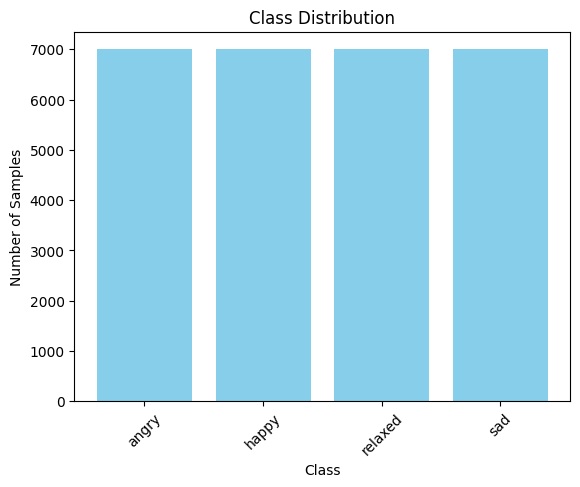

In [ ]:
#EDA
import matplotlib.pyplot as plt
from collections import Counter


# Get class distribution
class_counts = Counter([label for _, label in train_dataset.samples])
print("Class Distribution in Training Dataset:")
for class_index, count in class_counts.items():
    print(f"Class {train_dataset.classes[class_index]}: {count} samples")

# Bar plot for class distribution
class_names = train_dataset.classes
class_sample_counts = [class_counts[i] for i in range(len(class_names))]

plt.bar(class_names, class_sample_counts, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import torch
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self, num_classes=4):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 27, kernel_size=5, padding=2),  # Output: (27, 128, 128)
            nn.BatchNorm2d(27),
            nn.PReLU(num_parameters=27),
            nn.MaxPool2d(kernel_size=2)                 # Output: (27, 64, 64)
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(27, 54, kernel_size=3, padding=1), # Output: (54, 64, 64)
            nn.BatchNorm2d(54),
            nn.PReLU(num_parameters=54),
            nn.MaxPool2d(kernel_size=2)                 # Output: (54, 32, 32)
        )
        self.layer3 = nn.Sequential(
            nn.Conv2d(54, 81, kernel_size=3, padding=1), # Output: (81, 32, 32)
            nn.BatchNorm2d(81),
            nn.PReLU(num_parameters=81),
            nn.MaxPool2d(kernel_size=2)                 # Output: (81, 16, 16)
        )
        self.layer4 = nn.Sequential(
            nn.Conv2d(81, 108, kernel_size=3, padding=1), # Output: (108, 16, 16)
            nn.BatchNorm2d(108),
            nn.PReLU(num_parameters=108),
            nn.MaxPool2d(kernel_size=2)                  # Output: (108, 8, 8)
        )
        self.layer5 = nn.Sequential(
            nn.Conv2d(108, 144, kernel_size=3, padding=1), # Output: (144, 8, 8)
            nn.BatchNorm2d(144),
            nn.PReLU(num_parameters=144),
            nn.MaxPool2d(kernel_size=2)                   # Output: (144, 4, 4)
        )

        # Fully connected layer
        self.fc = nn.Sequential(
            nn.Flatten(),                                 # Flatten the feature map
            nn.Dropout(p=0.5),
            nn.Linear(144 * 4 * 4, 512),                 # Adjust input size based on final feature map
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(512, num_classes)                  # Output layer for 4 classes
        )

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = self.fc(out)
        return out


In [ ]:

a = torch.rand(3, 3).to("cuda" if torch.cuda.is_available() else "cpu")
print(f"Tensor is on: {a.device}")


Tensor is on: cuda:0


In [ ]:
##########################################
# Training Function                      #
##########################################
def train_and_validate(model, train_loader, val_loader, criterion, optimizer, num_epochs):
    train_loss_history = []
    train_acc_history = []
    val_loss_history = []
    val_acc_history = []

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Track metrics
            running_loss += loss.item() * images.size(0)
            _, predicted = outputs.max(1)
            correct_train += predicted.eq(labels).sum().item()
            total_train += labels.size(0)

        train_epoch_loss = running_loss / total_train
        train_epoch_acc = 100.0 * correct_train / total_train
        train_loss_history.append(train_epoch_loss)
        train_acc_history.append(train_epoch_acc)

        # Validation phase
        model.eval()
        running_val_loss = 0.0
        correct_val = 0
        total_val = 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)

                outputs = model(images)
                loss = criterion(outputs, labels)

                running_val_loss += loss.item() * images.size(0)
                _, predicted = outputs.max(1)
                correct_val += predicted.eq(labels).sum().item()
                total_val += labels.size(0)

        val_epoch_loss = running_val_loss / total_val
        val_epoch_acc = 100.0 * correct_val / total_val
        val_loss_history.append(val_epoch_loss)
        val_acc_history.append(val_epoch_acc)

        # Print epoch results
        print(f"Epoch [{epoch+1}/{num_epochs}] "
              f"Train Loss: {train_epoch_loss:.4f}, Train Acc: {train_epoch_acc:.2f}% | "
              f"Val Loss: {val_epoch_loss:.4f}, Val Acc: {val_epoch_acc:.2f}%")

    return {
        'train_loss': train_loss_history,
        'train_acc': train_acc_history,
        'val_loss': val_loss_history,
        'val_acc': val_acc_history
    }

##########################################
# Train the Model                        #
##########################################
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNN().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()
history = train_and_validate(model, train_loader, val_loader, criterion, optimizer, num_epochs=15)

Epoch [1/15] Train Loss: 1.2975, Train Acc: 38.73% | Val Loss: 1.1476, Val Acc: 46.75%
Epoch [2/15] Train Loss: 1.0858, Train Acc: 52.48% | Val Loss: 1.0607, Val Acc: 51.75%
Epoch [3/15] Train Loss: 0.9668, Train Acc: 58.07% | Val Loss: 0.9105, Val Acc: 58.50%
Epoch [4/15] Train Loss: 0.8724, Train Acc: 62.97% | Val Loss: 1.0343, Val Acc: 53.25%
Epoch [5/15] Train Loss: 0.7819, Train Acc: 67.57% | Val Loss: 0.9212, Val Acc: 61.00%
Epoch [6/15] Train Loss: 0.6968, Train Acc: 71.34% | Val Loss: 0.9134, Val Acc: 67.50%
Epoch [7/15] Train Loss: 0.6212, Train Acc: 74.91% | Val Loss: 0.7913, Val Acc: 70.00%
Epoch [8/15] Train Loss: 0.5332, Train Acc: 78.83% | Val Loss: 0.7740, Val Acc: 71.50%
Epoch [9/15] Train Loss: 0.4667, Train Acc: 81.72% | Val Loss: 0.7848, Val Acc: 72.75%
Epoch [10/15] Train Loss: 0.4040, Train Acc: 84.80% | Val Loss: 0.8535, Val Acc: 72.00%
Epoch [11/15] Train Loss: 0.3568, Train Acc: 86.60% | Val Loss: 0.8974, Val Acc: 72.00%
Epoch [12/15] Train Loss: 0.3028, Train A

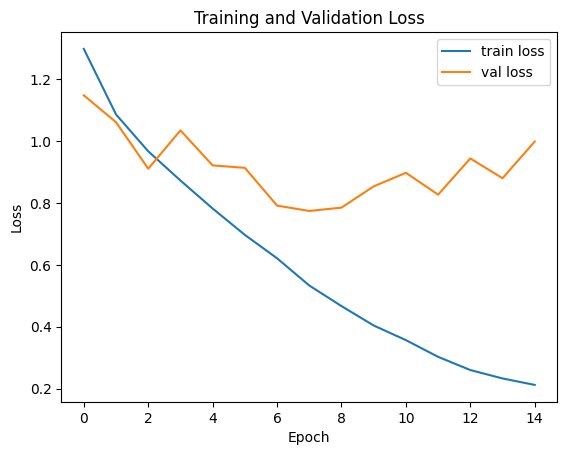

In [ ]:
# PLOT THE TRAINING AND THE LOSS
import matplotlib.pyplot as plt
plt.figure
plt.plot(history['train_loss'], label='train loss')
plt.plot(history['val_loss'], label='val loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

Text(0.5, 1.0, 'Training and Validation Accuracy')

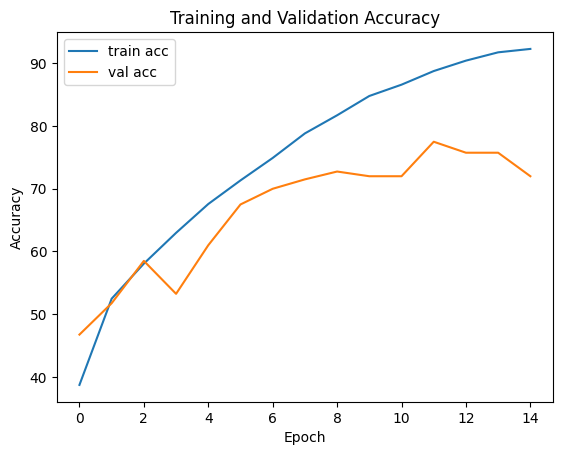

In [ ]:
#plot the Acc
plt.figure
plt.plot(history['train_acc'], label='train acc')
plt.plot(history['val_acc'], label='val acc')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

In [ ]:
# evaluate the test set and print the value
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f"Test Accuracy: {test_accuracy:.2f}%")



Test Accuracy: 72.62%


In [ ]:
#number of parameters
total_params = sum(p.numel() for p in model.parameters())
print(f"Total number of parameters: {total_params}")

Total number of parameters: 1457081


In [ ]:
# Save the model weights
torch.save(model.state_dict(), "model_weights.pkl")




## The proccess

Initially, we analyzed the dataset distribution and observed that it was uniform, with 700 images per label. After multiple failed attempts, we concluded that the model was overfitting, primarily because the dataset was too small. To address this, we decided to apply extensive augmentations to the training set, increasing its size from 2,800 to 30,366 images.

Throughout the experimentation process, we carefully analyzed the output after each training attempt. We tried tweaking hyperparameters such as the batch size, learning rate, and the number of epochs, but these adjustments alone did not yield significant improvements. The breakthrough came when we added a fifth layer to our CNN model, increasing its capacity to learn complex features.

After further optimization, we observed that the dataset consistently converged to an optimum around 15 epochs, striking a balance between underfitting and overfitting. This approach ultimately helped us improve the model's generalization and performance.